# Simulating quantum dynamics

The wavefunction of any closed quantum system is governed by the linear *Schrödinger equation*.
Under certain assumptions, it can be reduced to a *Lindblad master equation* that governs the density matrix of an open system of reduced size.
To further describe a weak measurement process of this open system, the Lindblad equation can be generalized to a *stochastic master equation*.

In this tutorial, we review how to simulate these three quantum differential equations with **dynamiqs**. To do so, we consider a simple two-level quantum system.

In [1]:
import torch
import dynamiqs as dq
import matplotlib.pyplot as plt

## The Schrödinger equation: Rabi flopping

We will begin by simulating Rabi oscillations of a two-level system.
The Schrödinger equation reads

$$
    \frac{d \lvert \psi \rangle}{dt} = -i H \lvert \psi \rangle \quad \text{with} \quad H = \delta \sigma_z + \Omega \sigma_x.
$$

where $\delta$ is a detuning and $\Omega$ the Rabi frequency.

### Initializing states

Let us first initialize our two-level system in its ground state, $\lvert \psi \rangle_0 = \lvert 0 \rangle$.
To do so, we can use [`dynamiqs.fock`](../python_api/utils/states/fock.html) which takes two inputs: the Hilbert space size (2) and the basis state (0).


In [2]:
psi0 = dq.fock(2, 0)
print(psi0.shape)
print(psi0)

torch.Size([2, 1])
tensor([[1.+0.j],
        [0.+0.j]])


In dynamiqs, the shape of all quantum states and operators has at least two dimensions.
This avoids systematic reshaping, and avoids coding mistakes (e.g. trying to multiply a ket and an operator in the wrong order).
In particular, all kets are of shape `(..., N, 1)`.

### Initializing a quantum system simulation

We now initialize the Hamiltonian that governs our system, using [`dynamiqs.sigmaz`](../python_api/utils/operators/sigmaz.html) and [`dynamiqs.sigmax`](../python_api/utils/operators/sigmax.html).

In [3]:
delta = 0.3  # detuning
Omega = 1.   # Rabi frequency
H = delta * dq.sigmaz() + Omega * dq.sigmax()

Let us then fix the total simulation time, and create a `t_save` list that will contain time slots at which we want to save the state of the system.

In [4]:
sim_time = 10.  # total time of evolution
num_save = 100  # number of time slots to save
t_save = torch.linspace(0., sim_time, num_save)

### Solving the Schrödinger equation

Finally, we run the Schrodinger equation solver, [`dynamiqs.sesolve`](../python_api/solvers/sesolve.html).

In [5]:
seresult = dq.sesolve(H, psi0, t_save)
print(seresult)

|██████████| 100.0% - time 00:00/00:00

==== Result ====
Method       : Dopri5
Start        : 2023-09-09 19:49:56
End          : 2023-09-09 19:49:56
Total time   : 0.06 s
states       : Tensor (100, 2, 1) | 1.56 Kb


The solver returns a [`dynamiqs.Result`](../python_api/utils/result.md) object.
We can see that the solver used the `Dopri5` method, which is the default solver for `sesolve`.
The state at each specified time slot was also saved in a tensor of shape `(num_save, 2, 1)`.
Let us plot the time evolution of ground and excited state populations.

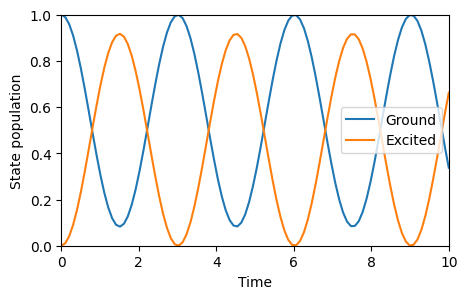

In [7]:
plt.figure(figsize=(5,3))
plt.plot(t_save, seresult.states[:, 0, 0].abs()**2, label=r'Ground')
plt.plot(t_save, seresult.states[:, 1, 0].abs()**2, label=r'Excited')

# formatting
plt.xlabel('Time')
plt.ylabel('State population')
plt.xlim(0, 10)
plt.ylim(0, 1)
plt.legend(frameon=True)

# display plot
plt.show()